# 🧹 Auto Insurance Fraud Detection - Data Cleaning & Preprocessing

## 📋 Complete Pipeline:
1. **Data Loading & Initial Exploration**
2. **Data Cleaning** - Remove redundant data, handle duplicates
3. **Missing Value Analysis & Treatment**
4. **Outlier Detection & Treatment**
5. **Data Transformation**
6. **Feature Engineering** - Create 5 new variables
7. **Ordinal Encoding & Final Preprocessing**

---

In [7]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 📊 1. Data Loading & Initial Exploration

In [8]:
# Load training datasets
print("📥 Loading datasets...")
train1 = pd.read_csv('dataset/Auto Insurance Fraud Claims (1).csv')
train2 = pd.read_csv('dataset/Auto Insurance Fraud Claims 02.csv')

# Combine training data
df_original = pd.concat([train1, train2], ignore_index=True)
df = df_original.copy()  # Working copy

print(f"✅ Dataset 1 shape: {train1.shape}")
print(f"✅ Dataset 2 shape: {train2.shape}")
print(f"✅ Combined dataset shape: {df.shape}")
print(f"\n📋 Columns ({len(df.columns)}): {list(df.columns)}")

📥 Loading datasets...
✅ Dataset 1 shape: (40000, 53)
✅ Dataset 2 shape: (20000, 53)
✅ Combined dataset shape: (60000, 53)

📋 Columns (53): ['Claim_ID', 'Bind_Date1', 'Customer_Life_Value1', 'Age_Insured', 'Policy_Num', 'Policy_State', 'Policy_Start_Date', 'Policy_Expiry_Date', 'Policy_BI', 'Policy_Ded', 'Policy_Premium', 'Umbrella_Limit', 'Insured_Zip', 'Gender', 'Education', 'Occupation', 'Hobbies', 'Insured_Relationship', 'Capital_Gains', 'Capital_Loss', 'Garage_Location', 'Accident_Date', 'Accident_Type', 'Collision_Type', 'Accident_Severity', 'authorities_contacted', 'Acccident_State', 'Acccident_City', 'Accident_Location', 'Accident_Hour', 'Num_of_Vehicles_Involved', 'Property_Damage', 'Bodily_Injuries', 'Witnesses', 'Police_Report', 'DL_Expiry_Date', 'Claims_Date', 'Auto_Make', 'Auto_Model', 'Auto_Year', 'Vehicle_Color', 'Vehicle_Cost', 'Annual_Mileage', 'DiffIN_Mileage', 'Low_Mileage_Discount', 'Fraud_Ind', 'Commute_Discount', 'Total_Claim', 'Injury_Claim', 'Property_Claim', 'Ve

In [9]:
# Basic dataset overview
print("📊 DATASET OVERVIEW")
print("=" * 60)
print(f"Total rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n🏷️ Data Types:")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} columns")

# Display sample data
print("\n🔍 Sample Data:")
df.head()

📊 DATASET OVERVIEW
Total rows: 60,000
Total columns: 53
Memory usage: 107.18 MB

🏷️ Data Types:
  object: 30 columns
  int64: 17 columns
  float64: 6 columns

🔍 Sample Data:


,Claim_ID,Bind_Date1,Customer_Life_Value1,Age_Insured,Policy_Num,Policy_State,Policy_Start_Date,Policy_Expiry_Date,Policy_BI,Policy_Ded,...,DiffIN_Mileage,Low_Mileage_Discount,Fraud_Ind,Commute_Discount,Total_Claim,Injury_Claim,Property_Claim,Vehicle_Claim,Vehicle_Registration,Check_Point
0,AA00000001,1/1/2023,12,28,123790687,OH,10/13/2023,4/13/2024,500/1000,1000,...,2499,0,N,0,6162.56,714.94,5370.74,76.88,IF47V1395,No
1,AA00000002,1/1/2023,12,31,129044473,IL,10/21/2023,4/21/2024,250/500,500,...,4242,1,N,0,20402.38,7669.31,5708.22,7024.85,EI51L7783,No
2,AA00000003,7/1/2022,18,50,146863149,OH,11/26/2023,5/26/2024,500/1000,500,...,2346,0,N,0,10839.12,3646.11,3468.94,3724.07,MU37B8905,No
3,AA00000004,1/1/2023,12,37,163100869,IL,8/8/2023,2/8/2024,500/1000,1000,...,2425,0,Y,0,17423.88,5585.62,1863.46,9974.80,RI52Q2108,No
4,AA00000005,3/1/2022,22,28,185582958,OH,11/12/2023,5/12/2024,250/500,1000,...,3890,1,N,0,24527.38,7224.79,3074.12,14228.47,UX39O9355,No


## 🧹 2. Data Cleaning - Remove Redundant Data

In [10]:
print("🧹 DATA CLEANING - REDUNDANCY CHECK")
print("=" * 60)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"🔍 Duplicate rows found: {duplicate_rows:,}")

if duplicate_rows > 0:
    print("\n📋 Sample duplicate rows:")
    print(df[df.duplicated()].head())
    
    # Remove duplicates
    df = df.drop_duplicates()
    print(f"✅ Removed {duplicate_rows:,} duplicate rows")
    print(f"📊 New dataset shape: {df.shape}")
else:
    print("✅ No duplicate rows found")

# Check for columns with single unique value (constant columns)
print("\n🔍 Checking for constant columns...")
constant_cols = []
for col in df.columns:
    if df[col].nunique() <= 1:
        constant_cols.append(col)
        
if constant_cols:
    print(f"⚠️ Constant columns found: {constant_cols}")
    df = df.drop(columns=constant_cols)
    print(f"✅ Removed {len(constant_cols)} constant columns")
else:
    print("✅ No constant columns found")

# Check for highly correlated columns (potential redundancy)
print("\n🔍 Checking for highly correlated numerical columns...")
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    high_corr_pairs = [(col, row) for col in upper_triangle.columns for row in upper_triangle.index 
                       if upper_triangle.loc[row, col] > 0.95]
    
    if high_corr_pairs:
        print(f"⚠️ Highly correlated pairs (>0.95): {high_corr_pairs}")
    else:
        print("✅ No highly correlated columns found")
        
print(f"\n📊 Final cleaned dataset shape: {df.shape}")

🧹 DATA CLEANING - REDUNDANCY CHECK
🔍 Duplicate rows found: 0
✅ No duplicate rows found

🔍 Checking for constant columns...
⚠️ Constant columns found: ['Check_Point']
✅ Removed 1 constant columns

🔍 Checking for highly correlated numerical columns...
✅ No highly correlated columns found

📊 Final cleaned dataset shape: (60000, 52)


## ❓ 3. Missing Value Analysis & Treatment

❓ MISSING VALUE ANALYSIS
📊 Columns with missing values: 2
                   Column  Missing_Count  Missing_Percentage
34          Police_Report          20808           34.680000
25  authorities_contacted           5605            9.341667


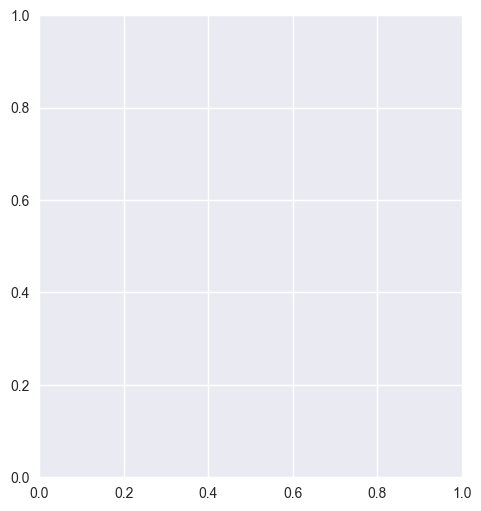

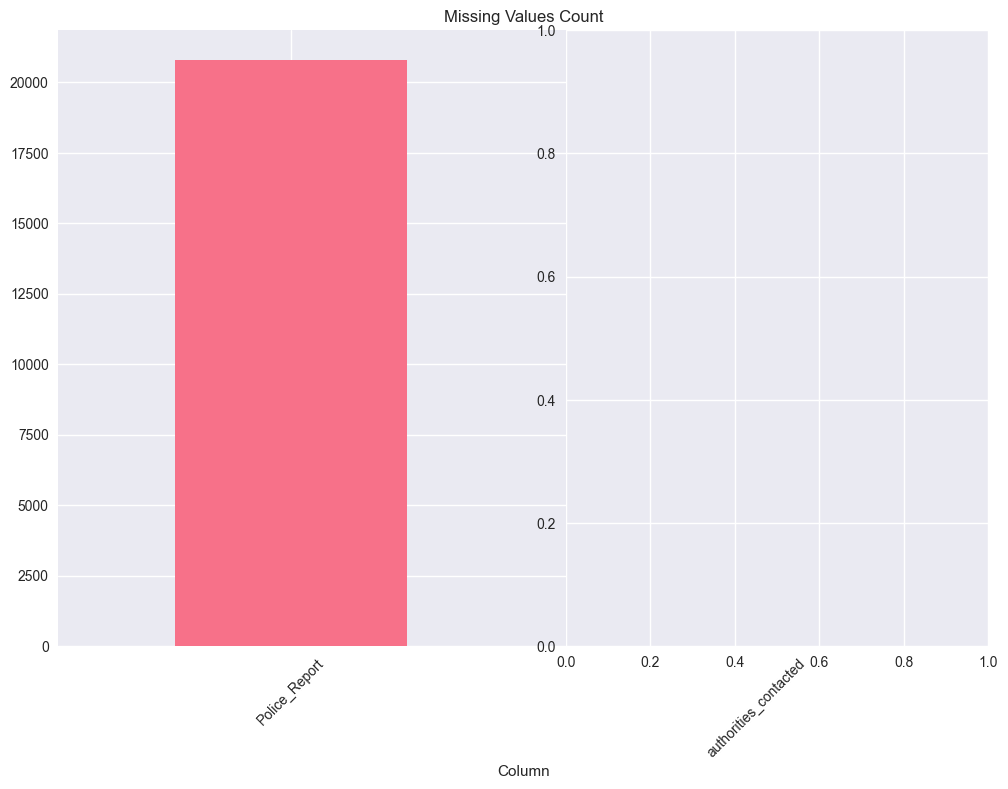

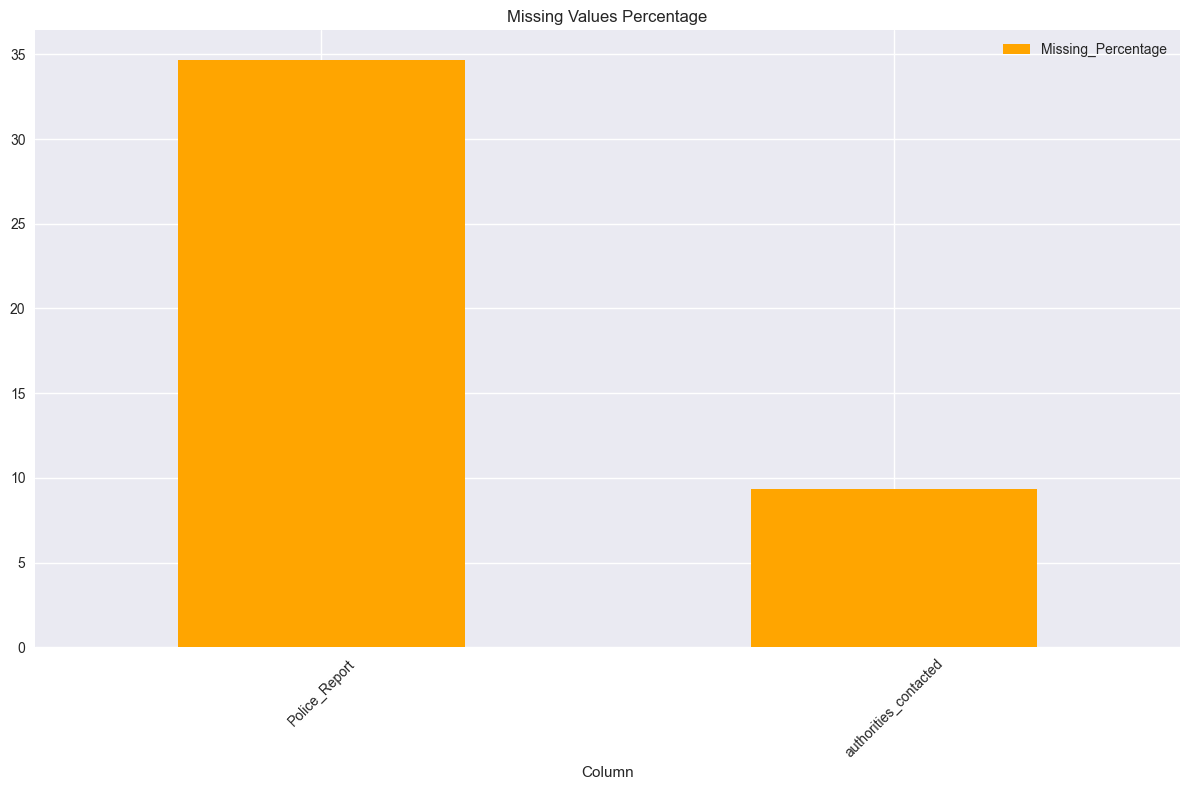

In [11]:
print("❓ MISSING VALUE ANALYSIS")
print("=" * 60)

# Calculate missing values
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_pct.values
}).sort_values('Missing_Count', ascending=False)

# Display missing value summary
missing_cols = missing_df[missing_df['Missing_Count'] > 0]
if len(missing_cols) > 0:
    print(f"📊 Columns with missing values: {len(missing_cols)}")
    print(missing_cols)
else:
    print("✅ No missing values found!")

# Visualize missing values
if len(missing_cols) > 0:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    missing_cols.head(10).plot(x='Column', y='Missing_Count', kind='bar')
    plt.title('Missing Values Count')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    missing_cols.head(10).plot(x='Column', y='Missing_Percentage', kind='bar', color='orange')
    plt.title('Missing Values Percentage')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

In [12]:
# Missing Value Treatment Strategy
print("🔧 MISSING VALUE TREATMENT")
print("=" * 60)

# Create a copy for treatment
df_treated = df.copy()

# Treatment strategy based on missing percentage
for idx, row in missing_cols.iterrows():
    col = row['Column']
    missing_pct = row['Missing_Percentage']
    
    if missing_pct > 70:
        # Drop columns with >70% missing
        print(f"🗑️ Dropping {col} (Missing: {missing_pct:.1f}%)")
        df_treated = df_treated.drop(columns=[col])
        
    elif missing_pct > 30:
        # Create missing indicator for high missing columns
        df_treated[f'{col}_missing'] = df_treated[col].isnull().astype(int)
        print(f"🏷️ Created missing indicator for {col}")
        
        # Fill based on data type
        if df_treated[col].dtype in ['object', 'category']:
            df_treated[col] = df_treated[col].fillna('Unknown')
            print(f"📝 Filled {col} with 'Unknown'")
        else:
            df_treated[col] = df_treated[col].fillna(df_treated[col].median())
            print(f"📊 Filled {col} with median")
            
    else:
        # Standard imputation for <30% missing
        if df_treated[col].dtype in ['object', 'category']:
            mode_val = df_treated[col].mode()[0] if not df_treated[col].mode().empty else 'Unknown'
            df_treated[col] = df_treated[col].fillna(mode_val)
            print(f"📝 Filled {col} with mode: {mode_val}")
        else:
            median_val = df_treated[col].median()
            df_treated[col] = df_treated[col].fillna(median_val)
            print(f"📊 Filled {col} with median: {median_val}")

# Verify no missing values remain
remaining_missing = df_treated.isnull().sum().sum()
print(f"\n✅ Missing values after treatment: {remaining_missing}")
print(f"📊 Dataset shape after missing value treatment: {df_treated.shape}")

🔧 MISSING VALUE TREATMENT
🏷️ Created missing indicator for Police_Report
📝 Filled Police_Report with 'Unknown'
📝 Filled authorities_contacted with mode: Police

✅ Missing values after treatment: 0
📊 Dataset shape after missing value treatment: (60000, 53)
